<a href="https://colab.research.google.com/github/UN-things/IS-project/blob/main/IS_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nombre cool del proyecto :3

**Integrantes:**
- Valeria Huepa Ducuara
- Liseth Yurany Arevalo Yaruro
- Guiselle Tatiana Zambrano Penagos

## Comprensión del Negocio

[TripAdvisor](https://www.tripadvisor.co/) es un sitio web estadounidense que proporciona reseñas de contenido relacionado con viajes, es gratuita y se financia con publicidad. Esta empresa busca encontrar un modo de mantener o incrementar el flujo de usuarios que la visitan (huéspedes y propietarios), pues es con este volúmen con el que cuenta para recaudar dinero de la publicidad que expone en su sitio web.

Una solución propuesta es emplear las reseñas que los huéspedes dejan y ofrecer un análisis de sentimiento general, donde se puedan evidenciar cuales son los factores que más llaman la atención de los usuarios y cuales son los determinantes de una mala o buena experiencia, así mismo se buscaría clasificar las opiniones por temáticas para comprender cuáles son los aspectos más mencionados. Esto promovería a los propietarios de hoteles que usen el sitio a mejorar su servicio y los huéspedes estararán satifechos con el servicio de los hoteles y las ofertas que ofrezaca la página web, manteniendo e incrementando la cantidad de usuarios que la usen.

## Comprensión de los datos

Para la realización de esta fase, empezaremos por explorar los datos directamente con ayuda de algunas librerías disponibles en python.

### Librerías requeridas

In [1]:
%%capture
pip install --upgrade pycaret

In [26]:
%%capture
!pip install scipy nltk
!pip install statsmodels --upgrade

In [2]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as py
import nltk
from pycaret.nlp import *
from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [27]:
%%capture
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [20]:
%%capture   
!python -m spacy download en_core_web_sm
!python -m textblob.download_corpora

In [3]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [4]:
%%capture
color = sns.color_palette()
py.init_notebook_mode(connected=True)
nltk.download('vader_lexicon')

In [5]:
%%capture
! mkdir -p data
! cd data && wget -nc https://raw.githubusercontent.com/UN-things/IS-project/main/data/tripadvisor_hotel_reviews.csv

### Lectura de datos

A continuación veremos una pequeña muestra de los datos.

Este datasetestá compuesto por 2 atributos (`Review` y `Rating`) con 20490 registros.*texto en cursiva*

In [6]:
df = pd.read_csv('data/tripadvisor_hotel_reviews.csv', sep=',')
df.head()

Review  Rating
0  nice hotel expensive parking got good deal sta...       4
1  ok nothing special charge diamond member hilto...       2
2  nice rooms not 4* experience hotel monaco seat...       3
3  unique, great stay, wonderful time hotel monac...       5
4  great stay great stay, went seahawk game aweso...       5

In [7]:
print("El dataset tiene la siguiente dimensionalidad:", df.shape)

El dataset tiene la siguiente dimensionalidad: (20491, 2)


Ahora veremos que tipo de atributos posee el dataset:

#### **Rating**
- Es un tipo de dato numérico que, por registro, toma uno de los los valores de `{1, 2, 3, 4, 5}`.
- Este indica la puntuación que otorgan los usuarios a un hotel presente en la plataforma.
- A partir de la grafica podemos ver que la mayoría de los usuario tienen una opinión positiva frente a los hoteles que aparecen en la plataforma

In [8]:
print("El conjunto de valores que toma el atributo 'Rating' es:", df["Rating"].unique())

El conjunto de valores que toma el atributo 'Rating' es: [4 2 3 5 1]


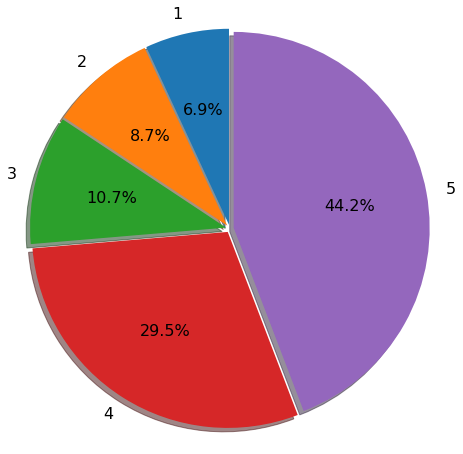

In [9]:
temp = df.groupby('Rating').size().reset_index(name="count")
temp['Percentage'] = round(100 * temp['count']  / temp['count'].sum(), 2)

plt.rcParams['font.size'] = 16.0

labels = temp['Rating']
sizes = temp['Percentage']
explode = (0.02, 0.02, 0.02, 0.02, 0.02)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

#### **Review**
- Es un tipo de dato categórico.
- En este se describe la persepción de los usuarios frente a los hoteles que aparecen el la página de TripAdvisor.
- En promedio la retroalimentación brindada por los usuarios consta de 725 caracteres.

In [10]:
df["Length"] = df["Review"].apply(len)
print("El review más corto consta de", df["Length"].min(), "caracteres.")
print("El review más largo consta de", df["Length"].max(), "caracteres.")
print("En promedio los reviews tienen una longitud de ", df["Length"].mean(), "caracteres.")

El review más corto consta de 44 caracteres.
El review más largo consta de 13501 caracteres.
En promedio los reviews tienen una longitud de  724.896832755844 caracteres.


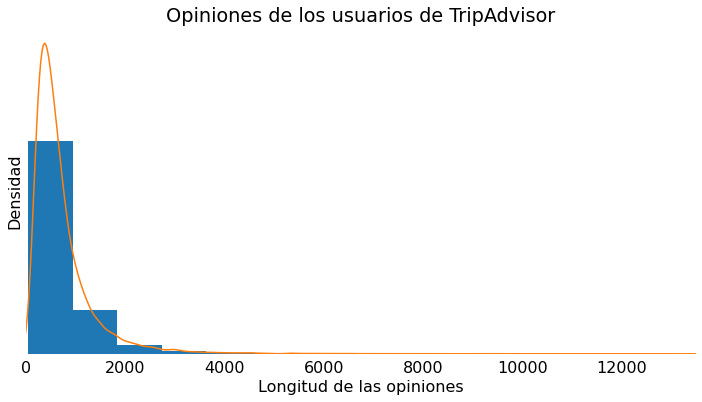

In [11]:
fig, ax = plt.subplots(figsize = (12,6))
df["Length"].plot(kind = "hist", density = True, bins = 15) # change density to true, because KDE uses density
df["Length"].plot(kind = "kde")

ax.set_ylabel("Densidad")
ax.set_yticks([])

ax.set_xlabel("Longitud de las opiniones")
ax.set_xlim(0, 13500)

ax.set_title("Opiniones de los usuarios de TripAdvisor")

ax.tick_params(left = False, bottom = False)
for ax, spine in ax.spines.items():
    spine.set_visible(False)

plt.show()

### Conclusiones
- Ambos atributos (`Review` y `Rating`) son prometedores, esto porque permiten describir cuál es la percepación que tienen los usuarios de TripAdvisor sobre los Hoteles que se encentran en su página web.
- Hay una gran cantidad de datos, suficientes para crear un modelo que describa adecuadamente cuál es la percepción de los usuarios frente a los aspectos que rodean a un Hotel.
- Los datos vistos a simple vista muestran que en general los usuarios están conformes con los servicios ofrecidos por los hoteles.

## Preparación de los datos

En esta etapa nos enfocaremos en generar nuevas columnas en el dataset que nos indiquen de una mejor forma cuál es el sentimiento de los usuarios frente a los hoteles, así podremos definir cuáles datos son los más importantes y cuáles pueden ser descartados.

Usaremos `SentimentIntensityAnalyzer` de la librería `nltk`, luego usaremos la función `polarity_scores` que nos arrojá  un objeto cuyos valores describiran el porcentaje presente de cada sentimiento (positivo, neutral y negativo) del texto procesado.

`polarity_scores` arrojará un dato adicional llamado `compound`, este es un flotante que tiene valores entre el rango $[-1,1]$ e indica el sentimiento de un texto, donde:
- Si es mayor a cero, se concidera positivo.
- Si es igual a cero, se concidera neutral.
- Si es menor a cero, se concidera negativo.

Finalmente estos valores son almacenados en una nueva columna llamada `Scores`.

In [12]:
sid = SentimentIntensityAnalyzer()
df['Scores'] = df['Review'].apply(lambda hotel: sid.polarity_scores(str(hotel)))
df.head()

Review  ...                                             Scores
0  nice hotel expensive parking got good deal sta...  ...  {'neg': 0.072, 'neu': 0.643, 'pos': 0.285, 'co...
1  ok nothing special charge diamond member hilto...  ...  {'neg': 0.11, 'neu': 0.701, 'pos': 0.189, 'com...
2  nice rooms not 4* experience hotel monaco seat...  ...  {'neg': 0.081, 'neu': 0.7, 'pos': 0.219, 'comp...
3  unique, great stay, wonderful time hotel monac...  ...  {'neg': 0.06, 'neu': 0.555, 'pos': 0.385, 'com...
4  great stay great stay, went seahawk game aweso...  ...  {'neg': 0.135, 'neu': 0.643, 'pos': 0.221, 'co...

[5 rows x 4 columns]

Creamos una nueva columna llamada `Compound`, esta almacenará el item `compound` de la columna `Scores`.
Con ayuda de la función `describe` podemos ver una descripción general de los datos que tenemos hastaahora.

Podemos ver que para el atriuto `Compound` en promedio su valor es de `0.8`, esto es bueno, ya que nos indica que la percepción de gran parte de los usuarios es positiva.

In [13]:
df['Compound'] = df['Scores'].apply(lambda score_dict: score_dict['compound'])
df.describe()

Rating        Length      Compound
count  20491.000000  20491.000000  20491.000000
mean       3.952223    724.896833      0.803430
std        1.233030    689.101024      0.455671
min        1.000000     44.000000     -0.997400
25%        3.000000    339.000000      0.918400
50%        4.000000    537.000000      0.973800
75%        5.000000    859.000000      0.988800
max        5.000000  13501.000000      0.999900

Ahora crearemos una nueva columna categórica llamada `Sentiment` esta estará compuesta por uno de 3 valores (`POSITIVE`, `NEUTRAL` Y `NEGATIVE`), nos permitirá clasificar los `Reviews` y darles un tratamiento especializado más adelante.

In [14]:
df['Sentiment']=''
df.loc[df.Compound>0,'Sentiment']='POSITIVE'
df.loc[df.Compound==0,'Sentiment']='NEUTRAL'
df.loc[df.Compound<0,'Sentiment']='NEGATIVE'
df.head()

Review  ...  Sentiment
0  nice hotel expensive parking got good deal sta...  ...   POSITIVE
1  ok nothing special charge diamond member hilto...  ...   POSITIVE
2  nice rooms not 4* experience hotel monaco seat...  ...   POSITIVE
3  unique, great stay, wonderful time hotel monac...  ...   POSITIVE
4  great stay great stay, went seahawk game aweso...  ...   POSITIVE

[5 rows x 6 columns]

Graficaremos la proporcionalidad presente en el dataset frente al atributo `Sentimet`.

Podemos observar que la mayor parte corresponde a reseñas positivas y colo el $0.1 \%$ de estas son neutrales.

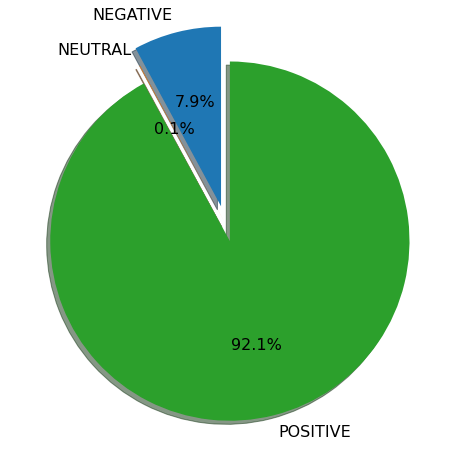

In [15]:
temp_2 = df.groupby('Sentiment').size().reset_index(name="count")
temp_2['Percentage'] = round(100 * temp_2['count']  / temp_2['count'].sum(), 2)

labels = temp_2['Sentiment']
sizes = temp_2['Percentage']
explode = (0.1, 0, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.rcParams['font.size'] = 16.0

fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Ahora teniendo los datos clasificados podemos extraer cuáles son esos aspectos determinantes entre una buena y mala experiencia, para ello usaremos nubes de palabras.

Puesto que la muestra de valores neutros es tan pequeña, no realizaremos ningún tratamiento sobre los mismos.

## Modelado

En primer lugar veremos cuáles fueron los resultados ofrecidos por las nubes de palabras y luego realizaremos el modelo usando `pycaret`, en específico su módulo `NLP`.

### Nubes de palabras

En esta sección definiremos una función llamada `print_word_cloud()` que se encargará de imprimir la nube de palabras para un dataset pasado como parámetro, para ello se crearon 2 datasets, uno para las `Reviews` positivas y otra para las negativas. No se realizó un wordCloud para los `Reviews` neutrales ya que no hay suficientes muestras.

In [16]:
def print_word_cloud(df, color):
    texto_c = ''.join(df)
    wordcloud = WordCloud(max_font_size=100, max_words=100, background_color=color,\
                            scale = 20,width=1000, height=500).generate(texto_c)
    plt.figure( figsize=(20,10) )
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [17]:
df_pos = df[ df['Sentiment'] == 'POSITIVE']
df_pos = df_pos['Review']
df_neg = df[ df['Sentiment'] == 'NEGATIVE']
df_neg = df_neg['Review']

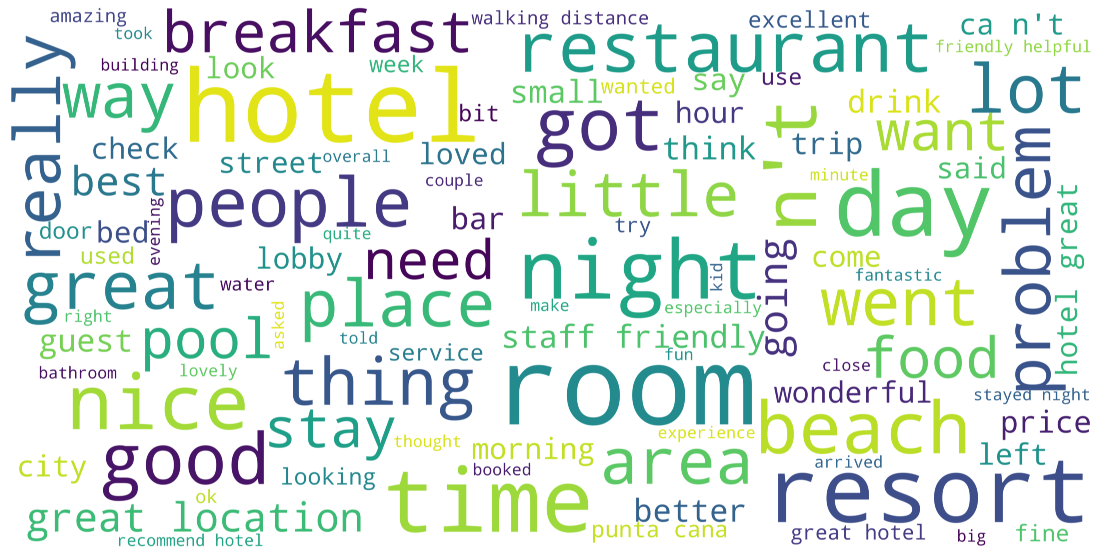

In [18]:
print_word_cloud(df_pos, "white")

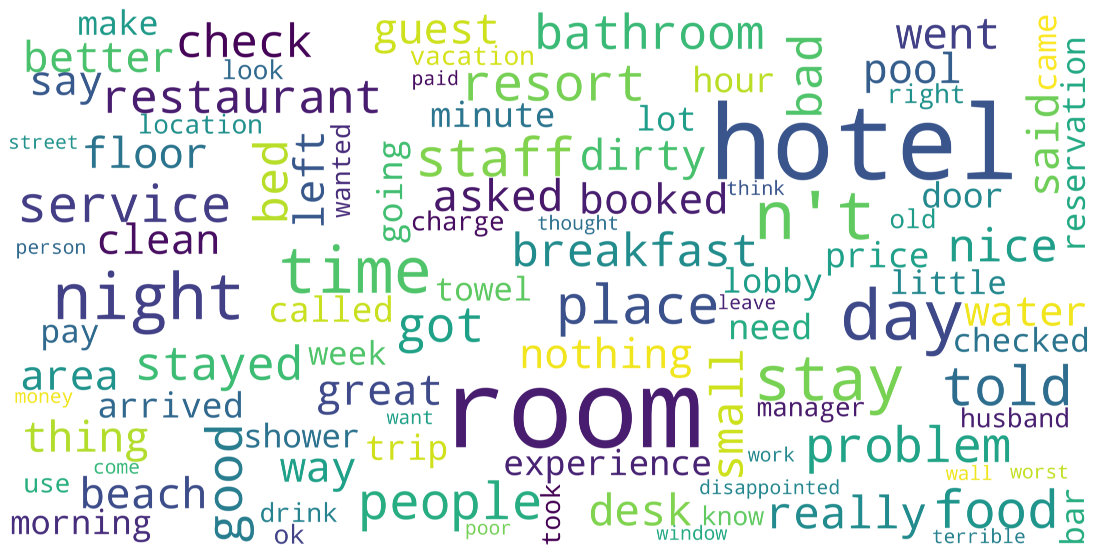

In [19]:
print_word_cloud(df_neg, "white")

### Pycaret

El módulo NLP (Natural Language Processing) de PyCaret (`pycaret.nlp`) es un módulo de aprendizaje automático no supervisado que se puede utilizar para analizar los datos de texto mediante la creación de un modelo de tema para encontrar la estructura semántica oculta en los documentos. El módulo NLP de PyCaret viene integrado con una amplia gama de técnicas de preprocesamiento de texto, que es el paso fundamental en cualquier problema de NLP. Transforma el texto sin procesar en un formato del que pueden aprender los algoritmos de aprendizaje automático.

#### Configuración del entorno

La función `setup()` inicializa el entorno en pycaret y realiza varios pasos de preprocesamiento de texto que son imperativos para trabajar con problemas de PNL. setup debe ser llamado antes de ejecutar cualquier otra función en pycaret. Se necesitan dos parámetros: el marco de datos de pandas y el nombre de la columna de texto pasada como parámetro de destino.

Cuando se ejecuta la configuración, los siguientes pasos de preprocesamiento se aplican automáticamente:

- **Eliminación de caracteres numéricos:** todos los caracteres numéricos se eliminan del texto. Se reemplazan con espacios en blanco.
- **Eliminación de caracteres especiales:** todos los caracteres especiales no alfanuméricos se eliminan del texto. También se reemplazan con espacios en blanco.
- **Tokenización de palabras:** la tokenización de palabras es el proceso de dividir una gran muestra de texto en palabras. Este es el requisito fundamental en las tareas de procesamiento del lenguaje natural, en las que cada palabra debe capturarse por separado para su posterior análisis.
- **Eliminación de palabras vacías:** una palabra vacía (o palabra irrelevante) es una palabra que a menudo se elimina del texto porque es común y proporciona poco valor para la recuperación de información, aunque puede ser lingüísticamente significativa. Ejemplos de tales palabras en idioma inglés son: "the", "a", "an", "in", etc.
- **Extracción de bigrama:** un bigrama es una secuencia de dos elementos adyacentes de una cadena de tokens, que suelen ser letras, sílabas o palabras. Por ejemplo: la palabra New York se captura como dos palabras diferentes "New" y "York" cuando se realiza la tokenización, pero si se repite las veces suficientes, `Bigram Extraction` representará la palabra como una.
- **Extracción de trigram:** similar a la extracción de bigrama, el trigram es una secuencia de tres elementos adyacentes de una cadena de tokens.
- **Lematización:** La lematización es el proceso de agrupar las formas flexionadas de una palabra para que puedan analizarse como una sola palabra, identificadas por el lema de la palabra o la forma del diccionario. En el idioma inglés, la palabra aparece en varias formas flexionadas. Por ejemplo, el verbo  'to walk' puede aparecer como  'walk', 'walked', 'walks', 'walking'. La forma básica, 'walk', que uno podría buscar en un diccionario, se llama lema de la palabra.
- **Palabras irrelevantes personalizadas:** muchas veces el texto contiene palabras que no son palabras irrelevantes según la regla del lenguaje, pero que añaden poca o ninguna información. Son palabras que pueden ser muy obvias según el contexto y no añaden valor. Puede eliminar esas palabras del corpus mediante el parámetro `custom_stopwords` asignandole una lista con estas palabras.



**Nota:** Algunas funcionalidades en pycaret.nlp requieren un modelo de idioma inglés. El modelo de idioma no se descarga automáticamente cuando instala pycaret. Por este motivo debe instalarce ejecutando:

In [21]:
# Controla la aleatoriedad del experimento
initial = setup(data = df, target = 'Review', session_id = 666)

Una vez que la configuración se ejecuta con éxito, imprime la siguiente información:
- `session_id`: Un número pseduo-aleatorio distribuido como semilla en todas las funciones para su posterior reproducibilidad.
- `Documents`: número de documentos (o muestras en el conjunto de datos si se pasa el marco de datos).
- `Vocab Size`: Tamaño del vocabulario en el corpus después de aplicar todo el preprocesamiento del texto, como la eliminación de palabras vacías, extracción de bigramas / trigramas, lematización, etc.
- `Custom Stopwords`: Es un valor booleano que indica si se ingresaron palabras irrelevantes personalizadas.


Todos los pasos de preprocesamiento de texto se realizan automáticamente cuando ejecuta `setup()`. Estos pasos son imprescindibles para realizar cualquier experimento de PNL. La función `setup()` prepara el corpus y el diccionario que está listo para usar para los modelos de tema que puede crear usando la función `create_model()`.

#### Creación del modelo

pycaret ofrece varias opciones para crear un modelo. En este caso usarelos `lda` que hace referencia a Latent Dirichlet Allocation (LDA), este es un modelo estadístico generativo que permite que grupos no observados expliquen por qué algunas partes de los datos son similares. Por ejemplo, si las observaciones son palabras recopiladas en documentos, postula que cada documento es una mezcla de un pequeño número de temas y que la presencia de cada palabra es atribuible a uno de los temas del documento.

In [22]:
models()

Name                  Reference
ID                                                               
lda        Latent Dirichlet Allocation     gensim/models/ldamodel
lsi           Latent Semantic Indexing     gensim/models/lsimodel
hdp     Hierarchical Dirichlet Process     gensim/models/hdpmodel
rp                  Random Projections      gensim/models/rpmodel
nmf  Non-Negative Matrix Factorization  sklearn.decomposition.NMF

Para general el modelo se debe ingresar su tipo, en nuestro caso `lda`, el número de temas por el que van a clusterizar los datos y pasaremos al parámetro `multi_core` el valor booleano `True`, esto es para que tome todos los núcleos de la CPU para paralelizar y acelerar el entrenamiento del modelo.

In [43]:
lda = create_model('lda', num_topics=2, multi_core=True)

In [44]:
print(lda)

LdaModel(num_terms=32301, num_topics=2, decay=0.5, chunksize=100)


Ahora que tenemos un modelo, nos gustaría asignar las proporciones de tema a nuestro conjunto de datos para analizar los resultados, para ello usaremos la función `assign_model()` que recibe el modelo y retorna un dataset con nuevas columnas:
- `Topic_n`: Genera una columna por cada tema en donde indica la dominancia de este en el `Review`. Los valores que toma están en el intervalo `[0, 1]`
- `Dominant_Topic`: Indica cuál fue el tema dominante del `Review` procesado.
- `Perc_Dominant_Topic`: Indica el valor de dominancia del item dominante. El valor que toma están en el intervalo `[0, 1]`.

In [45]:
lda_results = assign_model(lda)
lda_results.head()

Review  ...  Perc_Dominant_Topic
0  nice hotel expensive parking get good deal sta...  ...                 0.97
1  special charge decide chain shoot anniversary ...  ...                 0.63
2  nice room experience hotel hotel level positiv...  ...                 0.66
3  unique great stay wonderful time location exce...  ...                 0.83
4  great stay great stay go seahawk game building...  ...                 0.56

[5 rows x 10 columns]

In [46]:
evaluate_model(lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Frequency Plot', 'freque…

In [47]:
plot_model(lda,'topic_model')

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.005219 -0.092106       1        1  53.789782
0      0.005219  0.092106       2        1  46.210218, topic_info=          Term          Freq         Total Category  logprob  loglift
24       hotel  43216.000000  43216.000000  Default  30.0000  30.0000
4027    resort   7659.000000   7659.000000  Default  29.0000  29.0000
856       pool   7973.000000   7973.000000  Default  28.0000  28.0000
27    location   8316.000000   8316.000000  Default  27.0000  27.0000
51        stay  26305.000000  26305.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
35        nice   4012.287883  10836.441953   Topic2  -5.2091  -0.2216
313      place   3653.381722   8534.127463   Topic2  -5.3028  -0.0765
148      staff   4386.834711  15571.682936   Topic2  -5.1199  -0.4949
36       night   4102.039032  13099.587073   Topic2  -5.1870  -0.3891
51        stay   4230.655674  26305.457954   Topic2  -5.1561  -1.0555

[186 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
278       1  0.000902   activity
278       2  0.999518   activity
876       1  0.003948       alot
876       2  0.996744       alot
1591      1  0.998087  apartment
...     ...       ...        ...
530       2  0.766349       week
237       1  0.997550    weekend
237       2  0.002404    weekend
804       1  0.996819     window
804       2  0.003119     window

[281 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [48]:
plot_model(lda, plot = 'tsne')

In [49]:
plot_model(lda, plot = 'topic_distribution')